/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


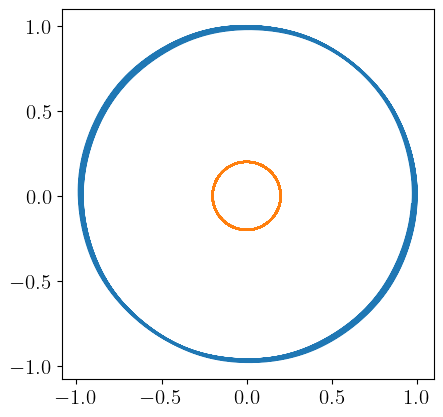

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


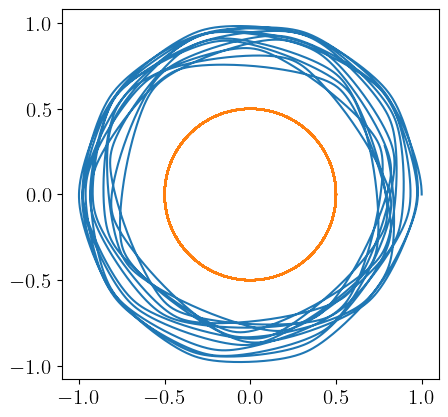

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, ode, solve_ivp
# import smplotlib
plt.rcParams['font.size'] = 15
# plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
r = 0.2
omega = 2 * np.pi
def odes(t, arej):
    x, y, u, v = arej
    x1, y1 = r * np.cos(omega*t), r * np.sin(omega*t)
    x2, y2 = r * np.cos(omega*t + np.pi), r * np.sin(omega*t + np.pi)
    d1 = (x - x1) ** 2 + (y - y1)**2
    d2 = (x - x2) ** 2 + (y - y2)**2
    xpika = u
    ypika = v
    upika = - 0.5 * (x - x1) * np.power(d1, -3/2) - 0.5 * (x - x2) * np.power(d2, -3/2)
    vpika = - 0.5 * (y - y1) * np.power(d1, -3/2) - 0.5 * (y - y2) * np.power(d2, -3/2)

    return [xpika, ypika, upika, vpika]
initial = [1, 0, 0, 1]
t_span = np.arange(0, 60, 0.01)
sol = solve_ivp(odes, t_span=[t_span.min(), t_span.max()],
                    t_eval = t_span,
                    y0=initial, dense_output=True,
                    rtol=1e-20, atol=1e-20)
plt.plot(sol.y[0, :], sol.y[1, :])
x1, y1 = r * np.cos(omega*t_span), r * np.sin(omega*t_span)
plt.plot(x1, y1)
plt.gca().set_aspect("equal")
plt.savefig("images/2-1-orbite_1.pdf")
plt.show()

r = 0.5
omega = 2 * np.pi
def odes(t, arej):
    x, y, u, v = arej
    x1, y1 = r * np.cos(omega*t), r * np.sin(omega*t)
    x2, y2 = r * np.cos(omega*t + np.pi), r * np.sin(omega*t + np.pi)
    d1 = (x - x1) ** 2 + (y - y1)**2
    d2 = (x - x2) ** 2 + (y - y2)**2
    xpika = u
    ypika = v
    upika = - 0.5 * (x - x1) * np.power(d1, -3/2) - 0.5 * (x - x2) * np.power(d2, -3/2)
    vpika = - 0.5 * (y - y1) * np.power(d1, -3/2) - 0.5 * (y - y2) * np.power(d2, -3/2)

    return [xpika, ypika, upika, vpika]
initial = [1, 0, 0, 1]
t_span = np.arange(0, 60, 0.01)
sol = solve_ivp(odes, t_span=[t_span.min(), t_span.max()],
                    t_eval = t_span,
                    y0=initial, dense_output=True,
                    rtol=1e-20, atol=1e-20)
plt.plot(sol.y[0, :], sol.y[1, :])
x1, y1 = r * np.cos(omega*t_span), r * np.sin(omega*t_span)
plt.plot(x1, y1)
plt.gca().set_aspect("equal")
plt.savefig("images/2-1-orbite_2.pdf")
plt.show()

In [2]:
r = 0.2
omega = 2 * np.pi
phi = np.pi * 0.5

initial = [1, 0, 0,  1]
t_span = np.arange(0, 20, 0.001)

sols = []
from tqdm import tqdm
for r in tqdm(np.linspace(0, 0.9, 30)):
    for phi in [0, np.pi * 0.5]:
        def odes(t, arej):
            x, y, u, v = arej
            x1, y1 = r * np.cos(omega*t + phi), r * np.sin(omega*t + phi)
            x2, y2 = r * np.cos(omega*t + phi + np.pi), r * np.sin(omega*t + phi + np.pi)
            d1 = (x - x1) ** 2 + (y - y1)**2
            d2 = (x - x2) ** 2 + (y - y2)**2
            xpika = u
            ypika = v
            upika = - 0.5 * (x - x1) * np.power(d1, -3/2) - 0.5 * (x - x2) * np.power(d2, -3/2)
            vpika = - 0.5 * (y - y1) * np.power(d1, -3/2) - 0.5 * (y - y2) * np.power(d2, -3/2)

            return [xpika, ypika, upika, vpika]

        sol = solve_ivp(odes, t_span=[t_span.min(), t_span.max()],
                            t_eval = t_span,
                            y0=initial, dense_output=True,
                            rtol=1e-20, atol=1e-20)
        sol.r = r
        sol.phi = phi
        ds = (sol.y[0, :]**2 + sol.y[1,:]**2)**0.5
        sol.ds = ds
        sols.append(sol)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [01:19<00:00,  2.65s/it]


/tmp/ipykernel_237253/772662828.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


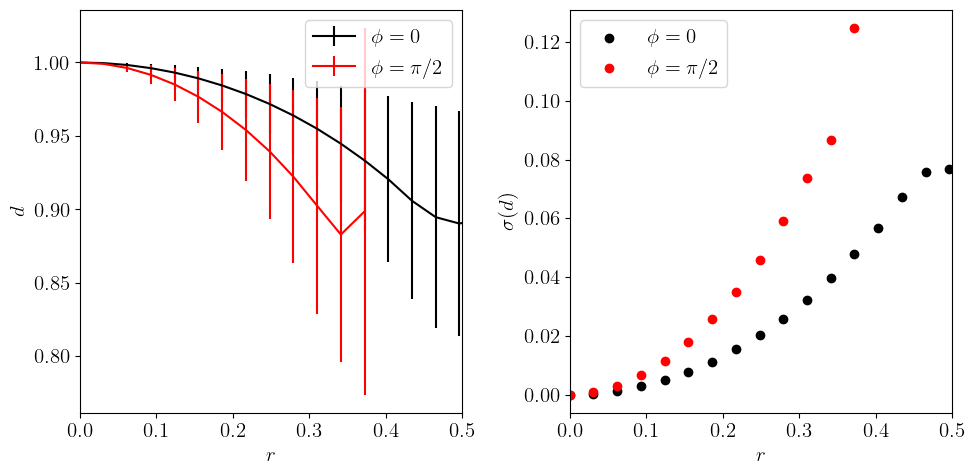

In [3]:
df = pd.DataFrame(data=dict(
    r = [sol.r for sol in sols],
    phi = ["0" if sol.phi == 0 else f"0.5 pi" for sol in sols],
    d_mean = [np.mean(sol.ds) for sol in sols],
    d_std=[np.std(sol.ds) for sol in sols]
))
df = df[df.d_mean < 1.6]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


subset = df[df.phi=="0"]
axes[0].errorbar(subset.r, subset.d_mean, yerr=subset.d_std, color="k", label=r"$\phi=0$")
axes[0].set_ylabel(r"$d$")
axes[0].set_xlabel(r"$r$")
axes[1].scatter(subset.r, subset.d_std, color="k", label=r"$\phi=0$")
axes[1].set_xlabel(r"$r$")
axes[1].set_ylabel(r"$\sigma(d)$")

subset = df[df.phi!="0"]
axes[0].errorbar(subset.r, subset.d_mean, yerr=subset.d_std, color="r", label=r"$\phi=\pi/2$")
axes[0].set_ylabel(r"$d$")
axes[0].set_xlabel(r"$r$")
axes[1].scatter(subset.r, subset.d_std, color="r", label=r"$\phi=\pi/2$")
axes[1].set_xlabel(r"$r$")
axes[1].set_ylabel(r"$\sigma(d)$")
axes[0].legend()
axes[1].legend()


axes[0].set_xlim((0, 0.5))
axes[1].set_xlim((0, 0.5))
# axes[0].set_ylim((0, 2))
# axes[1].set_ylim((None, 1))
fig.tight_layout()

fig.savefig("images/2-2-vplivr.pdf")
fig.show()

In [4]:
df = pd.DataFrame(data=dict(
    r = [sol.r for sol in sols],
    phi = ["0" if sol.phi == 0 else f"0.5 pi" for sol in sols],
    d_mean = [np.mean(sol.ds) for sol in sols],
    d_std=[np.std(sol.ds) for sol in sols]
))
df

,r,phi,d_mean,d_std
0,0.000000,0,1.000000,4.205616e-14
1,0.000000,0.5 pi,1.000000,4.205616e-14
2,0.031034,0,0.999570,3.045396e-04
3,0.031034,0.5 pi,0.999052,7.248459e-04
4,0.062069,0,0.998280,1.220148e-03
5,0.062069,0.5 pi,0.996216,2.895695e-03
6,0.093103,0,0.996122,2.752859e-03
7,0.093103,0.5 pi,0.991518,6.500403e-03
8,0.124138,0,0.993088,4.912958e-03
9,0.124138,0.5 pi,0.984980,1.151761e-02


# What is the fate of the planet as a function of $\omega$ and $\phi$?

In [5]:
def integrate(omega = 2*np.pi, phi=0, r=0.5):
    initial = [1, 0, 0,  1]
    def odes(t, arej):
        x, y, u, v = arej
        x1, y1 = r * np.cos(omega*t + phi), r * np.sin(omega*t + phi)
        x2, y2 = r * np.cos(omega*t + phi + np.pi), r * np.sin(omega*t + phi + np.pi)
        d1 = (x - x1) ** 2 + (y - y1)**2
        d2 = (x - x2) ** 2 + (y - y2)**2
        xpika = u
        ypika = v
        upika = - 0.5 * (x - x1) * np.power(d1, -3/2) - 0.5 * (x - x2) * np.power(d2, -3/2)
        vpika = - 0.5 * (y - y1) * np.power(d1, -3/2) - 0.5 * (y - y2) * np.power(d2, -3/2)

        return [xpika, ypika, upika, vpika]

    sol = solve_ivp(odes, t_span=[0,50],
                        y0=initial, dense_output=True,
                        )
    sol.T = (np.power(sol.y[2,:], 2) + np.power(sol.y[3,:], 2))*0.5
    x1, y1 = r * np.cos(omega*sol.t + phi), r * np.sin(omega*sol.t + phi)
    x2, y2 = r * np.cos(omega*sol.t + phi + np.pi), r * np.sin(omega*sol.t + phi + np.pi)
    sol.d1 =np.power((sol.y[0, :] - x1)**2 + (sol.y[1, :] - y1)**2, 0.5)
    sol.d2 =np.power((sol.y[0, :] - x2)**2 + (sol.y[1, :] - y2)**2, 0.5)
    sol.H = sol.T - 0.5 * np.power(sol.d1, -1) - 0.5* np.power(sol.d2, -1)
    return sol

sol = integrate()

In [15]:
results = []
num_omega, num_phi = 100, 100
omegas, phis = np.linspace(-2 * np.pi, 2 * np.pi, num_omega), np.linspace(0, np.pi*2, num_phi)
X, Y = np.meshgrid(omegas, phis)
FATE = np.empty_like(X)
IND = np.empty_like(X)
from tqdm import tqdm
for i in tqdm(range(X.shape[0])):
    for j in range(X.shape[1]):
        sol = integrate(omega=omegas[i], phi=phis[j])
        r = 1 if sol.H[-1] > 0 else -1
        FATE[j,i] = sol.H[-1]
        maxtime =( sol.t[sol.H<0]).max()
        IND[j, i] = maxtime if r > 0 else np.nan


100%|██████████| 100/100 [12:09<00:00,  7.30s/it]


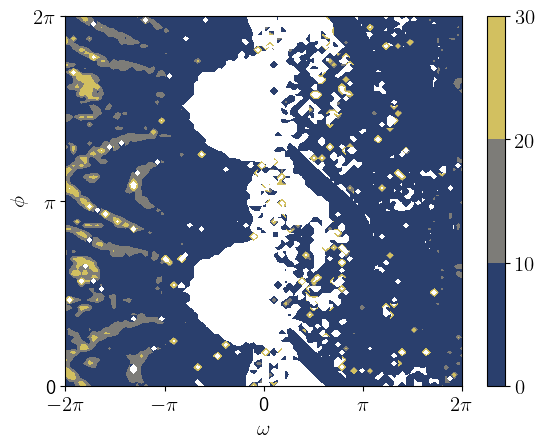

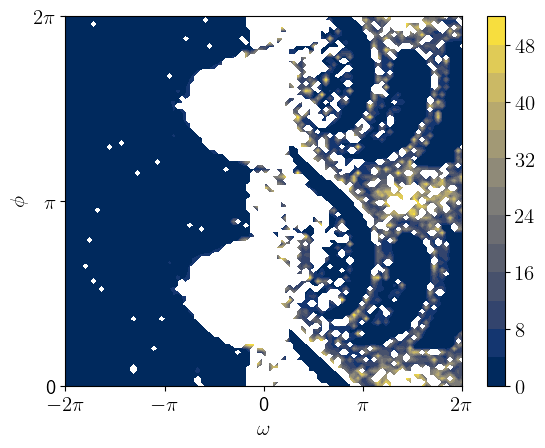

In [27]:
plt.contourf(omegas, phis, FATE, levels=[ 0, 10, 20, 30], cmap="cividis")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\phi$")
x_ticks = [-2*np.pi, -np.pi , 0, np.pi,  2*np.pi]
x_labels = [r"$-2\pi$", r"$-\pi$", "0",  r"$\pi$", r"$2\pi$"]
y_ticks = [0, np.pi,  2*np.pi]
y_labels = ["0",  r"$\pi$", r"$2\pi$"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.colorbar()
plt.savefig("images/2-3-fazni-prostor-.pdf")
plt.show()

plt.contourf(omegas, phis, IND, levels = 15, cmap="cividis")
plt.ylabel(r"$\phi$")
plt.xlabel(r"$\omega$")
x_ticks = [-2*np.pi, -np.pi , 0, np.pi,  2*np.pi]
x_labels = [r"$-2\pi$", r"$-\pi$", "0",  r"$\pi$", r"$2\pi$"]
y_ticks = [0, np.pi,  2*np.pi]
y_labels = ["0",  r"$\pi$", r"$2\pi$"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.colorbar()
plt.savefig("images/2-3-escape_time.pdf")
plt.show()

In [25]:
FATE.max()


np.float64(1606075.6075639108)